<a href="https://colab.research.google.com/github/nawaz-kmr/Sentimental-analysis-of-text-tweets-from-6-different-sentiments-using-Transformers/blob/main/Sentimental-analysis-of-text-tweets-from-6-different-sentiments-using-Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Project PipeLine

1.Loading the Dataset 
2.Pre-processing the raw data
3.Getting BERT Pre-trained model and its tokenizer
4.Training and evaluation
5.Prediction Pipeline'''

'Project PipeLine\n\n1.Loading the Dataset \n2.Pre-processing the raw data\n3.Getting BERT Pre-trained model and its tokenizer\n4.Training and evaluation\n5.Prediction Pipeline'

In [ ]:
Loading the Dataset
The dataset we are using the Emotions dataset for NLP.
This dataset contains text and their respective emotions, and it has train-data, test-data, and validation data

In [ ]:
import pandas as pd


In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/MyDrive/Sentimentalanalysis/'

Mounted at /gdrive
/gdrive/MyDrive/Sentimentalanalysis


In [ ]:
uploaded = files.upload()

Saving train.txt to train.txt


In [ ]:
df_train = pd.read_csv('train.txt',header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')
df_val= pd.read_csv('val.txt',header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('test.txt',header=None, sep=';', names = ['Input','Sentiment'], encoding='utf-8')

In [ ]:
!ls

test.gdoc  test.txt  train.txt	Untitled.ipynb	val.gdoc  val.gsheet  val.txt


In [ ]:
df_train.shape

(16000, 2)

In [ ]:
df_test.shape

(2000, 2)

In [ ]:
df_val.shape

(2000, 2)

In [ ]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df_train.Sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
# Converting our Sentiment column into Categorical data

# Mapping sentiments label with some numbers using a python dictionary and
# then convert them into a categorical column using to_categorical.

encoded_dict = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}
df_train['e_Sentiment'] = df_train.Sentiment.map(encoded_dict)
df_val['e_Sentiment'] = df_val.Sentiment.map(encoded_dict)
df_test['e_Sentiment'] = df_test.Sentiment.map(encoded_dict)

In [ ]:
df_train.head()

,Input,Sentiment,e_Sentiment
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# converting our integer coded Sentiment column into categorical data(matrix)
y_train = to_categorical(df_train.e_Sentiment)
y_val = to_categorical(df_val.e_Sentiment)
y_test = to_categorical(df_test.e_Sentiment)

In [ ]:
y_test.shape

(2000, 6)

In [ ]:
y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_val

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# Looking at the Class Distribution
import matplotlib.pyplot as plt
plt.style.use('ggplot')

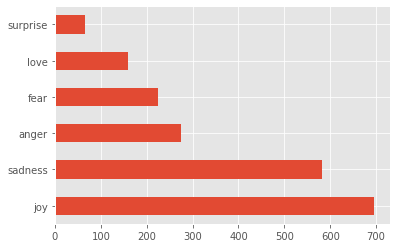

In [ ]:
df_test.Sentiment.value_counts().plot(kind='barh')

In [ ]:
# It is imbalanced data set

In [ ]:
# How Long Are Our Tweets
df_train.Input.str.split().apply(len).describe(percentiles=[0.50,0.70,0.95,0.99])

count    16000.000000
mean        19.166313
std         10.986905
min          2.000000
50%         17.000000
70%         23.000000
95%         41.000000
99%         52.000000
max         66.000000
Name: Input, dtype: float64

In [ ]:
# therefore max len of a tweet is 66

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 26.0 MB/s 
     |████████████████████████████████| 163 kB 67.4 MB/s 
     |████████████████████████████████| 7.6 MB 55.8 MB/s 


In [ ]:
# Loading Model and Tokenizer from the transformers package
import transformers
from transformers import AutoTokenizer, TFBertModel

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer.tokenize('This is my profoundly this accepted navigation')

['This', 'is', 'my', 'profound', '##ly', 'this', 'accepted', 'navigation']

In [ ]:
# Input Data Modeling

In [ ]:
# Before training, we need to convert the input textual data into BERT’s input data format using a tokenizer.
x_train = tokenizer(text=df_train.Input.tolist(),
                    add_special_tokens=True,
                    max_length= 65,
                    truncation= True,
                    padding=True,
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )
x_val = tokenizer(text=df_val.Input.tolist(),
                    add_special_tokens=True,
                    max_length= 65,
                    truncation= True,
                    padding=True,
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )
x_test = tokenizer(text=df_test.Input.tolist(),
                    add_special_tokens=True,
                    max_length= 65,
                    truncation= True,
                    padding=True,
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )

In [ ]:
x_val

{'input_ids': <tf.Tensor: shape=(2000, 65), dtype=int32, numpy=
array([[  101, 13280,  2296, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0],
       ...,
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  5098, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2000, 65), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
x_test

{'input_ids': <tf.Tensor: shape=(2000, 65), dtype=int32, numpy=
array([[  101, 13280,  2296, ...,     0,     0,     0],
       [  101, 13280,  1146, ...,     0,     0,     0],
       [  101,   178,  1309, ...,     0,     0,     0],
       ...,
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101, 13280,  2296, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2000, 65), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [ ]:
input_ids = x_train['input_ids']
attention_masks = x_train['attention_mask']

In [ ]:
input_ids

<tf.Tensor: shape=(16000, 65), dtype=int32, numpy=
array([[  101,   178,  1238, ...,     0,     0,     0],
       [  101,   178,  1169, ...,     0,     0,     0],
       [  101, 13280, 10810, ...,     0,     0,     0],
       ...,
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  1631, ...,     0,     0,     0],
       [  101,   178,  1221, ...,     0,     0,     0]], dtype=int32)>

In [ ]:
attention_masks

<tf.Tensor: shape=(16000, 65), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
# Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.utils import to_categorical


In [ ]:
max_len = 65


In [ ]:
input_ids = Input(shape=(max_len,),dtype = tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype= tf.int32, name="attention_mask")
embeddings = bert(input_ids,attention_mask = input_mask)[0]
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation = 'relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(6, activation = 'sigmoid')(out)
model = tf.keras.Model(inputs = [input_ids,input_mask],outputs=y)
model.layers[2].trainable =True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 65)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 65)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 65,                                            

In [ ]:
# Model Compilation
# Defining learning parameters and compiling the model.

In [ ]:
optimizer = Adam(learning_rate=5e-05,
                 epsilon=1e-08,
                 decay=0.01,
                 clipnorm=1.0
                )

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metric)

In [ ]:
# Model Training
history = model.fit(x = [x_train['input_ids'], x_train['attention_mask']],
                   y = y_train,
                   validation_data = ([x_val['input_ids'],x_val['attention_mask']], y_val),
                    epochs = 5,
                    batch_size = 32)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


500/500 [==============================] - 242s 453ms/step - loss: 0.4999 - balanced_accuracy: 0.8236 - val_loss: 0.1829 - val_balanced_accuracy: 0.9265
Epoch 2/5
500/500 [==============================] - 222s 444ms/step - loss: 0.1543 - balanced_accuracy: 0.9369 - val_loss: 0.1536 - val_balanced_accuracy: 0.9395
Epoch 3/5
500/500 [==============================] - 221s 442ms/step - loss: 0.1198 - balanced_accuracy: 0.9479 - val_loss: 0.1429 - val_balanced_accuracy: 0.9375
Epoch 4/5
500/500 [==============================] - 222s 444ms/step - loss: 0.1005 - balanced_accuracy: 0.9548 - val_loss: 0.1431 - val_balanced_accuracy: 0.9370
Epoch 5/5
500/500 [==============================] - 221s 443ms/step - loss: 0.0948 - balanced_accuracy: 0.9547 - val_loss: 0.1427 - val_balanced_accuracy: 0.9370


In [ ]:
history.history

{'loss': [0.4998682737350464,
  0.1543446183204651,
  0.11977619677782059,
  0.10046978294849396,
  0.09482363611459732],
 'balanced_accuracy': [0.823562502861023,
  0.9369375109672546,
  0.9479374885559082,
  0.9548125267028809,
  0.9546874761581421],
 'val_loss': [0.18287475407123566,
  0.15358203649520874,
  0.14292213320732117,
  0.14309853315353394,
  0.1426703780889511],
 'val_balanced_accuracy': [0.9265000224113464,
  0.9394999742507935,
  0.9375,
  0.9369999766349792,
  0.9369999766349792]}

In [ ]:
history.history['loss']

[0.4998682737350464,
 0.1543446183204651,
 0.11977619677782059,
 0.10046978294849396,
 0.09482363611459732]

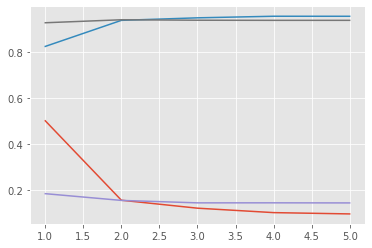

In [ ]:
plt.plot(range(1, len(history.history['loss']) + 1),history.history['loss'])
plt.plot(range(1, len(history.history['loss']) + 1),history.history['balanced_accuracy'])
plt.plot(range(1, len(history.history['loss']) + 1),history.history['val_loss'])
plt.plot(range(1, len(history.history['loss']) + 1),history.history['val_balanced_accuracy'])

In [ ]:
# Testing our model on the test data.

predicted_raw = model.predict([x_test['input_ids'],x_test['attention_mask']])
predicted_raw

63/63 [==============================] - 12s 140ms/step


array([[0.86736894, 0.10783351, 0.93086934, 0.8165814 , 0.99994874,
        0.13763094],
       [0.84960127, 0.1235247 , 0.9175711 , 0.8041302 , 0.99996173,
        0.21032193],
       [0.9021577 , 0.38998127, 0.7332235 , 0.8461332 , 0.9999496 ,
        0.25234035],
       ...,
       [0.5456773 , 0.00773223, 0.9999268 , 0.5840214 , 0.6761184 ,
        0.05790516],
       [0.7101575 , 0.01403794, 0.99992836, 0.15540403, 0.7282266 ,
        0.21045959],
       [0.2777689 , 0.99406946, 0.09720786, 0.03839692, 0.6183469 ,
        0.99189126]], dtype=float32)

In [ ]:
predicted_raw[0]

array([0.86736894, 0.10783351, 0.93086934, 0.8165814 , 0.99994874,
       0.13763094], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
# Taking the index of value having maximum probability.
y_predicted = np.argmax(predicted_raw ,axis =1)
y_predicted

array([4, 4, 4, ..., 2, 2, 1])

In [ ]:
y_true = df_test.e_Sentiment

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report,
print(classification_report(y_true,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       275
           1       0.89      0.91      0.90       224
           2       0.93      0.97      0.95       695
           3       0.90      0.78      0.84       159
           4       0.96      0.97      0.96       581
           5       0.76      0.77      0.77        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_true,y_predicted)

array([[245,   9,   8,   0,  13,   0],
       [  4, 203,   0,   0,   8,   9],
       [  1,   0, 673,  13,   1,   7],
       [  0,   1,  34, 124,   0,   0],
       [  8,   3,   6,   1, 563,   0],
       [  0,  12,   1,   0,   2,  51]])

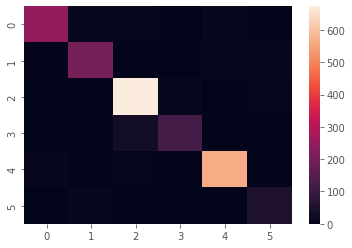

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true,y_predicted))

In [ ]:
model.save('my_model.h5')

In [ ]:
# Prediction Pipeline
texts =  input(str('Enter your text \n'))
texts_test = tokenizer(text=texts,
                    add_special_tokens=True,
                    max_length= 65,
                    truncation= True,
                    padding='max_length',
                    return_tensors='tf',
                    return_token_type_ids= False,
                    return_attention_mask= True,
                    verbose=True
                   )
pred_texts = model.predict([texts_test['input_ids'],texts_test['attention_mask']])
for key,value in zip(encoded_dict.keys(),pred_texts[0]):
  print(key , value)
print("**********************************************\n")
key= [k for k,v in encoded_dict.items() if v == np.argmax(pred_texts)]
print(key,max(pred_texts[0])*100)

Enter your text 
key= [k for k,v in encoded_dict.items() if v == np.argmax(pred_texts)] print(key,max(pred_texts[0])*100)
1/1 [==============================] - 0s 55ms/step
anger 0.7482479
fear 0.5632248
joy 0.9311549
love 0.16189279
sadness 0.53811854
surprise 0.16697325
**********************************************

['joy'] 93.11549067497253
